In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
def load_and_process_images(path_dir, class_labels, target_num_images):
    images = []
    labels = []
    min_images = float('inf')
    
    for label, class_name in enumerate(class_labels):
        class_dir = os.path.join(path_dir, class_name)
        class_images = []
        
        if not os.path.exists(class_dir):
            print(f"Directory '{class_name}' not found in '{path_dir}'. Skipping...")
            continue
        
        for jpg in os.listdir(class_dir):
            image_path = os.path.join(class_dir, jpg)
            image_high_resolution = cv2.imread(image_path)
            
            if image_high_resolution is None:
                print(f"Could not read image '{jpg}' in '{class_name}' directory. Skipping...")
                continue
            
            print(f"Reading image '{jpg}' in '{class_name}' directory...")
            image_change_color = cv2.cvtColor(image_high_resolution, cv2.COLOR_BGR2RGB)
            image_low_resolution = cv2.resize(image_change_color, (200, 200))
            class_images.append(image_low_resolution)
        
        num_images = len(class_images)
        if num_images < target_num_images:
            additional_images_required = target_num_images - num_images
            
            print(f"Class '{class_name}' has {num_images} images. {additional_images_required} additional images required to reach the target of {target_num_images} images.")

            # Data augmentation for classes with fewer images than the target
            data_generator = ImageDataGenerator(
                horizontal_flip=True,
                vertical_flip=True,
                rotation_range=270,
                fill_mode='nearest'
            )
            
            augmented_images = []
            for i in range(additional_images_required):
                random_index = np.random.randint(0, num_images)
                augmented_image = data_generator.random_transform(class_images[random_index])
                augmented_images.append(augmented_image)
            
            class_images.extend(augmented_images)
        
        images.extend(class_images[:target_num_images])
        labels.extend([label] * min(target_num_images, len(class_images)))
        min_images = min(min_images, len(class_images))
    
    return np.asarray(images), np.asarray(labels), min_images

# Define your dataset directory and class labels
dataset_directory = './Datasets/DataImages/'
class_labels = ['Catla', 'Cyprinus carpio', 'Grass Carp', 'Mori', 'Rohu', 'Silver']  # Add your own class labels here
target_num_images = 50  # Specify the desired number of images for each class

# Load and process images
images, labels, min_images = load_and_process_images(dataset_directory, class_labels, target_num_images)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Reading image 'Catla-Body (1).JPG' in 'Catla' directory...
Reading image 'Catla-Body (10).JPG' in 'Catla' directory...
Reading image 'Catla-Body (11).JPG' in 'Catla' directory...
Reading image 'Catla-Body (12).JPG' in 'Catla' directory...
Reading image 'Catla-Body (13).JPG' in 'Catla' directory...
Reading image 'Catla-Body (14).JPG' in 'Catla' directory...
Reading image 'Catla-Body (15).JPG' in 'Catla' directory...
Reading image 'Catla-Body (16).JPG' in 'Catla' directory...
Reading image 'Catla-Body (17).JPG' in 'Catla' directory...
Reading image 'Catla-Body (18).JPG' in 'Catla' directory...
Reading image 'Catla-Body (19).JPG' in 'Catla' directory...
Reading image 'Catla-Body (2).JPG' in 'Catla' directory...
Reading image 'Catla-Body (20).JPG' in 'Catla' directory...
Reading image 'Catla-Body (3).JPG' in 'Catla' directory...
Reading image 'Catla-Body (4).JPG' in 'Catla' directory...
Reading image 'Catla-Body (5).JPG' in 'Catla' directory...
Reading image 'Catla-Body (6).JPG' in 'Catla'

Epoch 1/20
8/8 [==============================] - 5s 546ms/step - loss: 15.2469 - accuracy: 0.2667 - val_loss: 205.2810 - val_accuracy: 0.1667
Epoch 2/20
8/8 [==============================] - 4s 541ms/step - loss: 4.7795 - accuracy: 0.3750 - val_loss: 101.7038 - val_accuracy: 0.1833
Epoch 3/20
8/8 [==============================] - 4s 552ms/step - loss: 2.2002 - accuracy: 0.5458 - val_loss: 18.6841 - val_accuracy: 0.3000
Epoch 4/20
8/8 [==============================] - 4s 562ms/step - loss: 1.1629 - accuracy: 0.5375 - val_loss: 39.0324 - val_accuracy: 0.2167
Epoch 5/20
8/8 [==============================] - 5s 577ms/step - loss: 0.9631 - accuracy: 0.6208 - val_loss: 6.3683 - val_accuracy: 0.2667
Epoch 6/20
8/8 [==============================] - 5s 564ms/step - loss: 0.6300 - accuracy: 0.7708 - val_loss: 4.0599 - val_accuracy: 0.3500
Epoch 7/20
8/8 [==============================] - 5s 581ms/step - loss: 0.3732 - accuracy: 0.8958 - val_loss: 7.6519 - val_accuracy: 0.5167
Epoch 8/20
8/

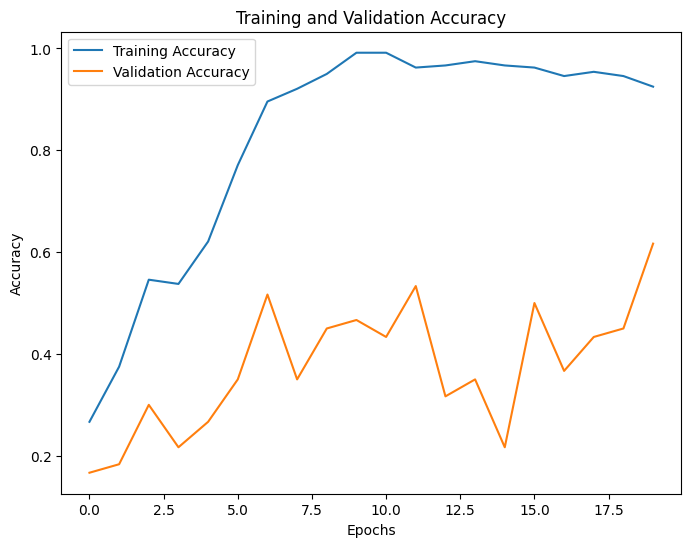

2/2 [==============================] - 0s 127ms/step - loss: 4.3982 - accuracy: 0.6167
Test Accuracy: 61.67%


In [7]:
# Define CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D(pool_size=(7, 7), strides=(3, 3), padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.GaussianNoise(0.1))
model.add(layers.Dense(32, activation=None, kernel_initializer='uniform'))
sqrt6 = tf.constant(tf.sqrt(6.0), dtype=tf.float32)
# Calculate the range for the kernel initializer
initializer = tf.keras.initializers.RandomUniform(minval=-sqrt6 / 200, maxval=sqrt6 / 200)
model.add(layers.Conv2D(64, (9, 9), padding='same', kernel_initializer=initializer))

model.add(layers.Flatten())
# what does layers.flatten do?
# https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras




model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [14]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)


# Convert predicted classes to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Define class names (replace with your own class names if needed)
class_names = class_labels

for i in range(len(y_test)):
    print(f"{class_names[y_test[i]]}, {class_names[predicted_classes[i]]}")

# Print the classification report
print(classification_report(y_test, predicted_classes, target_names=class_names))


2/2 [==============================] - 0s 98ms/step
Rohu, Catla
Silver, Silver
Mori, Catla
Catla, Catla
Rohu, Catla
Rohu, Cyprinus carpio
Mori, Mori
Grass Carp, Rohu
Catla, Catla
Mori, Mori
Rohu, Mori
Cyprinus carpio, Cyprinus carpio
Rohu, Rohu
Catla, Catla
Mori, Rohu
Rohu, Rohu
Silver, Silver
Rohu, Grass Carp
Grass Carp, Catla
Mori, Mori
Cyprinus carpio, Cyprinus carpio
Grass Carp, Grass Carp
Rohu, Catla
Silver, Rohu
Grass Carp, Grass Carp
Catla, Catla
Silver, Cyprinus carpio
Silver, Silver
Mori, Mori
Rohu, Mori
Catla, Catla
Mori, Mori
Catla, Catla
Catla, Catla
Rohu, Rohu
Grass Carp, Catla
Catla, Catla
Cyprinus carpio, Cyprinus carpio
Catla, Catla
Cyprinus carpio, Cyprinus carpio
Cyprinus carpio, Cyprinus carpio
Cyprinus carpio, Cyprinus carpio
Silver, Grass Carp
Cyprinus carpio, Cyprinus carpio
Cyprinus carpio, Cyprinus carpio
Cyprinus carpio, Cyprinus carpio
Rohu, Mori
Rohu, Rohu
Grass Carp, Catla
Rohu, Rohu
Mori, Mori
Grass Carp, Catla
Rohu, Mori
Cyprinus carpio, Cyprinus carpio
Si

In [8]:
import cv2
from tensorflow.keras.preprocessing import image as keras_image

# Load and preprocess the custom image
custom_image_path = './Datasets/popular-rohu-rohit-fish-indian-subcontinent-over-white-background-76376014.webp'  # Replace with your custom image path
custom_image = cv2.imread(custom_image_path)
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)  # Convert color to RGB
custom_image = cv2.resize(custom_image, (200, 200))  # Resize to match the model's input shape
custom_image = custom_image.astype('float32') / 255.0  # Normalize pixel values (if necessary)

# Reshape the image to match the expected input shape for the model
custom_image = np.expand_dims(custom_image, axis=0)  # Add batch dimension

# Make predictions using the loaded model
predictions = model.predict(custom_image)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_labels[predicted_class_index]

# Display prediction result
print(f"Predicted Class: {predicted_class}")


1/1 [==============================] - 0s 121ms/step
Predicted Class: Grass Carp
